In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Maching Pursuit

_Algorithme Matching Pursuit_$\qquad$ https://en.wikipedia.org/wiki/Matching_pursuit
 
$\quad$**Entrée :** Signal : $f(t)$, dictionnaire $D$.
 
$\quad$**Sortie :** Liste des coefficients $(a_{n})_{n=1}^{N}$ et des indices pour les atomes correspondants $(\gamma _{n})_{n=1}^{N}$.
 
$\quad$**Initialisation :**
   
$\qquad R_{1}\,\leftarrow \,f(t)$;
   
$\qquad n\,\leftarrow \,1$;
  
$\quad$**Répéter :**
 
$\qquad$Trouver $g_{\gamma _{n}}\in D$ avec le produit scalaire maximal $|\langle R_{n},g_{\gamma _{n}}\rangle |$;
   
$\qquad a_{n}\,\leftarrow \,\langle R_{n},g_{\gamma _{n}}\rangle /\|g_{\gamma _{n}}\|^{2}$;
    
$\qquad R_{n+1}\,\leftarrow \,R_{n}-a_{n}g_{\gamma _{n}}$;
   
$\qquad n\,\leftarrow \,n+1$;
   
$\quad$**Jusqu'à l'état d'arrêt** (par exemple : $\|R_{n}\|<\mathrm {seuil}$)
 
$\quad$**revenir**

In [2]:
def fct_MP (signaux, phi_i, seuil) :
    r_t = signaux
    
    liste_i = []
    liste_c = []
    liste_a = []
    liste_phi = []
    liste_a_phi = []
    liste_norm_rt = []
    liste_rt =[]
    po = 100
    liste_norm_rt.append(po)
    while po > seuil : #np.linalg.norm(r_t) > seuil  :
        c_i=[]
        c_abs = []
        for i in range(np.shape(phi_i)[0]) :
            c_i.append(np.vdot(r_t,phi_i[i]))
            c_abs.append(abs(np.vdot(r_t, phi_i[i])))

        i_star = np.argmax(c_abs)        
        a_i = c_i[i_star]/((np.linalg.norm(phi_i[i_star]))**2)
        r_t = r_t - (a_i*phi_i[i_star])
       
        liste_i.append(i_star)
        liste_c.append(c_i[i_star])
        liste_a.append(a_i)
        liste_phi.append(phi_i[i_star])
        liste_a_phi.append(a_i*phi_i[i_star])
        #liste_norm_rt.append(np.linalg.norm(r_t))
        liste_rt.append(r_t)
        po = np.linalg.norm(r_t)*100 / np.linalg.norm(signaux)
        liste_norm_rt.append(po)
        
    return r_t, liste_i, liste_c, liste_a, liste_phi, liste_a_phi, liste_norm_rt, liste_rt

In [3]:
def plot_fig (signaux, r, aphi, phi, norm_r):
    fig, axs = plt.subplots(4, 1, figsize=(fig_width, fig_width/1.6180))

    axs[0].plot(t, signaux, c='k')
    axs[0].plot(t, r, c='r')
    axs[0].plot(t, sum(aphi)+r, c='k')

    for x in range(np.shape(phi)[0]) :
        axs[1].plot(t, phi[x])
        axs[2].plot(t, aphi[x])
    axs[3].plot(norm_r, c='k')
    axs[3].yaxis.set_ticks(range(0, 101, 20))

## création de données synthétiques

### Signal 1

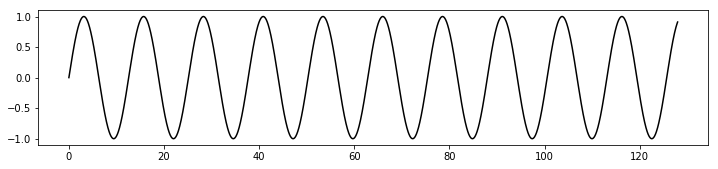

In [4]:
fig_width= 12
t = np.arange(0, 128, 0.05)

fig, axs = plt.subplots(1, 1, figsize=(fig_width, (fig_width/3)/1.6180))
signaux_1 = np.sin(t*0.5)
axs.plot(t, signaux_1, c='k');

### Signal 2

$$f(t)_{[t_i, M]} = e^{- \frac{t-t_i}{\tau}} \sin(2 \pi  f_i  (t-t_i))$$

$f_i$ = fréquence

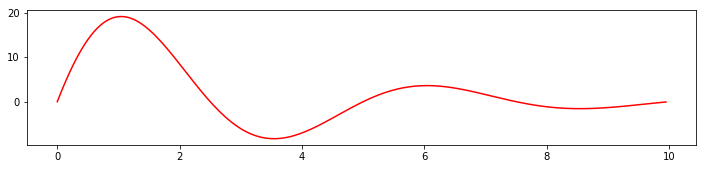

In [5]:
fig, axs = plt.subplots(1, 1, figsize=(fig_width, (fig_width/3)/1.6180))

f_i = 0.2
tau = 3
t_i = 10
t = np.arange(0, 10, 0.05)

axs.plot(t, np.exp(-(t-t_i)/tau)*np.sin(2*np.pi*f_i*(t-t_i)), c='r');

In [6]:
def donnee_s (t, f_i=0.2, tau=3, t_i=10) :
    return np.exp(-(t-t_i)/tau)*np.sin(2*np.pi*f_i*(t-t_i))

In [7]:
t = np.arange(0, 128, 0.05)
x = 0
signaux_2= []
while x < 128 :
    t_donnee = np.arange(0, 16, 0.05)
    for a in t_donnee :
        signaux_2.append(donnee_s(a))
    x = x + 16

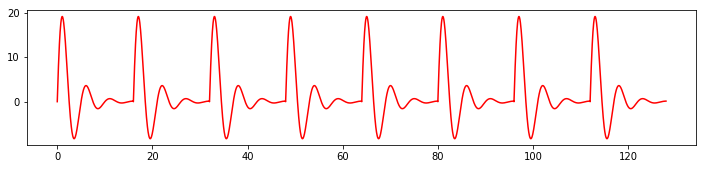

In [8]:
fig, axs = plt.subplots(1, 1, figsize=(fig_width, (fig_width/3)/1.6180))
axs.plot(t, signaux_2, c='r');

## dictionnaire sinusoïde

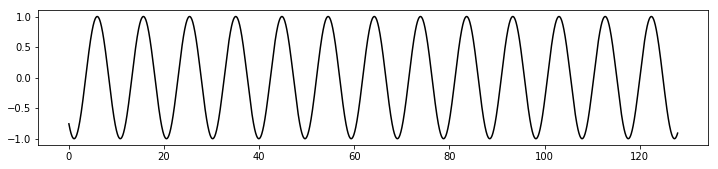

In [9]:
fig, axs = plt.subplots(1, 1, figsize=(fig_width, (fig_width/3)/1.6180))
axs.plot(t, np.sin(t*np.random.rand()+np.random.randint(10)), c='k');

In [10]:
dic_phi_sin = np.zeros((10000,2560))

for i in range(np.shape(dic_phi_sin)[0]):
    dic_phi_sin[i] = np.sin(np.arange(0,128,0.05)*np.random.rand()+np.random.randint(1000))

### Signal 1

8


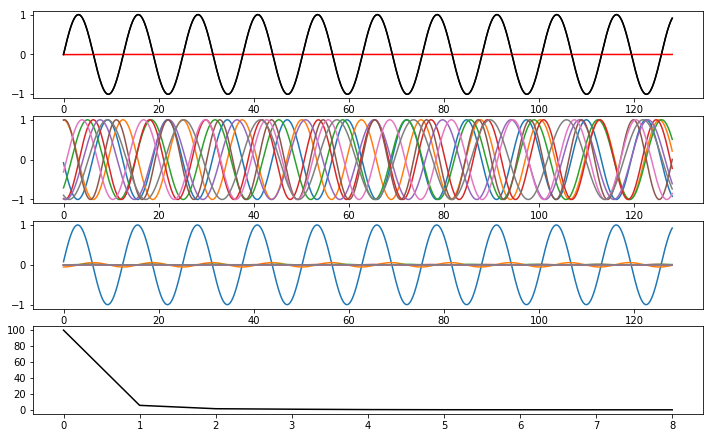

In [11]:
seuil = 0.1
r_sin_1, i_sin_1, c_sin_1, a_sin_1, phi_sin_1, aphi_sin_1, norm_r_sin_1, liste_rt_sin_1 = fct_MP (signaux_1, dic_phi_sin, seuil)
size = np.shape(i_sin_1)[0]
print(size)

plot_fig (signaux_1, r_sin_1, aphi_sin_1, phi_sin_1, norm_r_sin_1)

ce qui se passe à chaque boucle :

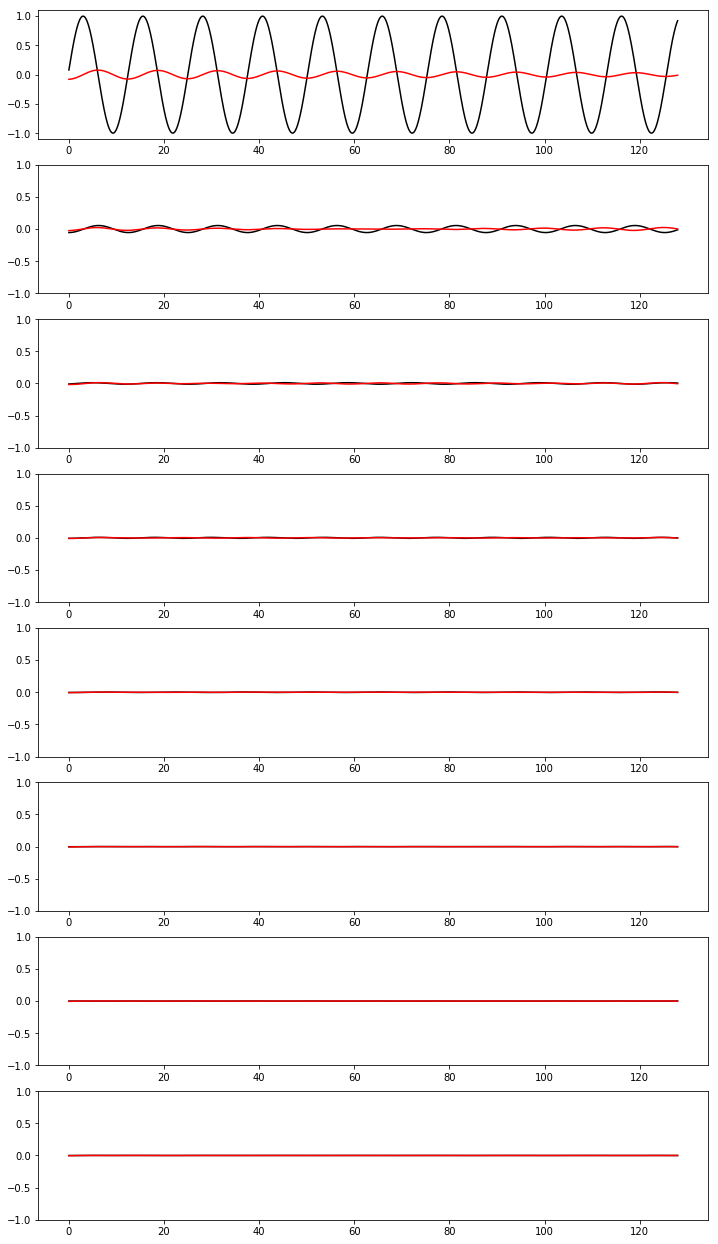

In [12]:
fig, axs = plt.subplots(size, 1, figsize=(fig_width, (fig_width/3)*(size+1)/1.6180))

for x in range(size) :
    axs[x].plot(t, aphi_sin_1[x], c='k')
    axs[x].plot(t, liste_rt_sin_1[x], c='r')
    axs[x].yaxis.set_ticks(np.arange(-1, 1.1, 0.5))

### Signal 2

339


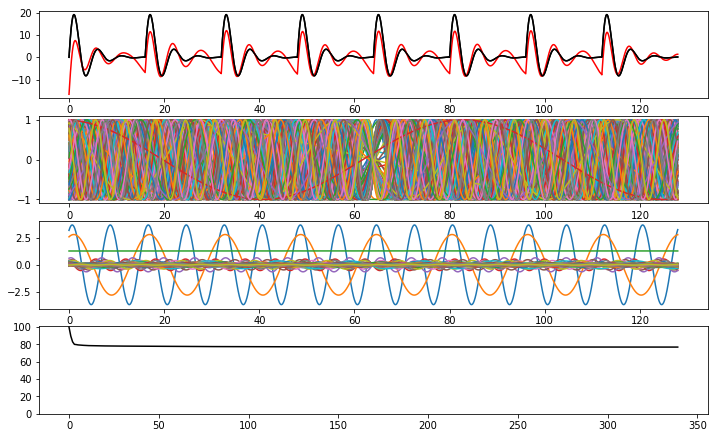

In [13]:
seuil = 77
r_sin_2, i_sin_2, c_sin_2, a_sin_2, phi_sin_2, aphi_sin_2, norm_r_sin_2, liste_rt_sin_2 = fct_MP (signaux_2, dic_phi_sin, seuil)
print (np.shape(i_sin_2)[0])

plot_fig (signaux_2, r_sin_2, aphi_sin_2, phi_sin_2, norm_r_sin_2)

ce dictionnaire marche mieu sur le **signal 1** :
- il faut moin de 10 boucles pour reduire à 0.1% le signal 1
- alors qu'il en faut plus de 300 pour reduire le signal 2 a 77%

## dictionnaire signaux

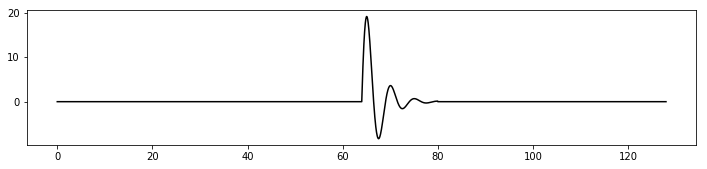

In [14]:
x = 0
dico= []
while x < (128/0.05) :
    if (x == 64/0.05) :
        t_donnee = np.arange(0, 16, 0.05)
        for a in t_donnee :
            dico.append(donnee_s(a))
        x = x + (16/0.05)
    else :
        dico.append(0)
        x=x+1

fig, axs = plt.subplots(1, 1, figsize=(fig_width, (fig_width/3)/1.6180))
axs.plot(t, dico, c='k');

In [15]:
dic_phi_sig = np.zeros((1000,2560))

for i in range(np.shape(dic_phi_sig)[0]):
    x = 0
    dico= []
    while x < (128/0.05) :
        if (x == np.random.randint((128/0.05)-(16/0.05))) :
            t_donnee = np.arange(0, 16, 0.05)
            for a in t_donnee :
                dico.append(donnee_s(a))
            x = x + (16/0.05)
        else :
            dico.append(0)
            x=x+1
    
    dic_phi_sig[i] = dico

### Signal 1

640


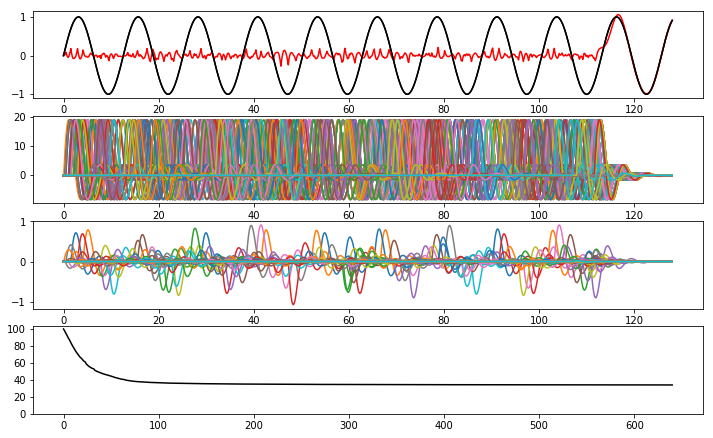

In [16]:
seuil = 34
r_sig_1, i_sig_1, c_sig_1, a_sig_1, phi_sig_1, aphi_sig_1, norm_r_sig_1, liste_rt_sig_1 = fct_MP (signaux_1, dic_phi_sig, seuil)
print (np.shape(i_sig_1)[0])

plot_fig (signaux_1, r_sig_1, aphi_sig_1, phi_sig_1, norm_r_sig_1)

### Signal 2

39


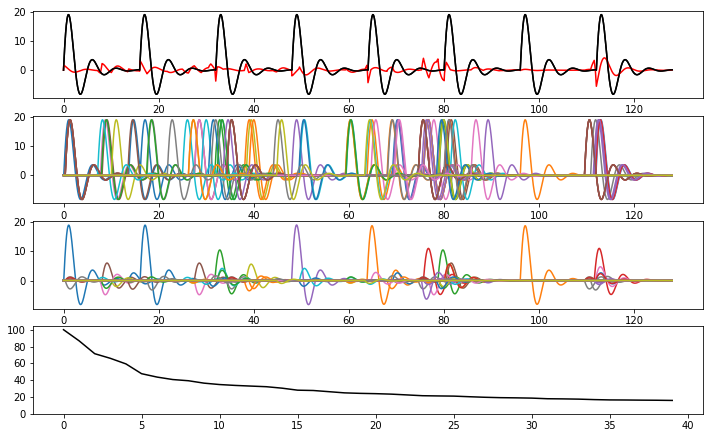

In [17]:
seuil = 16
r_sig_2, i_sig_2, c_sig_2, a_sig_2, phi_sig_2, aphi_sig_2, norm_r_sig_2, liste_rt_sig_2 = fct_MP (signaux_2, dic_phi_sig, seuil)
print (np.shape(i_sig_2)[0])

plot_fig (signaux_2, r_sig_2, aphi_sig_2, phi_sig_2, norm_r_sig_2)

ce dictionnaire marche mieu sur le **signal 2** :
- il faut moins de 100 boucles pour reduire à 16% le signal 2
- alors qu'il en faut plus de 600 pour reduire le signal 1 a 34%

## dictionnaire random

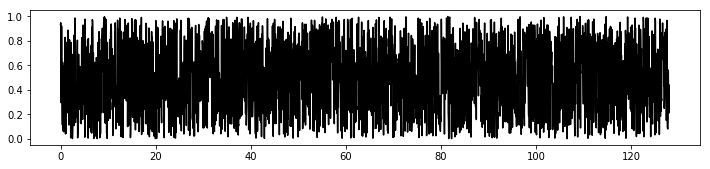

In [18]:
dic_phi_rand = np.random.rand(10000, 2560)

fig, axs = plt.subplots(1, 1, figsize=(fig_width, (fig_width/3)/1.6180))
axs.plot(t, dic_phi_rand[0, :], c='k');

### Signal 1

2197


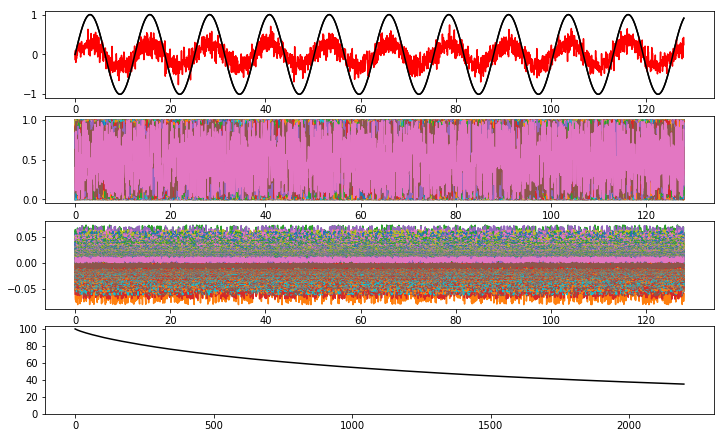

In [19]:
seuil = 35
r_rand_1, i_rand_1, c_rand_1, a_rand_1, phi_rand_1, aphi_rand_1, norm_r_rand_1, liste_rt_rand_1 = fct_MP (signaux_1, dic_phi_rand, seuil)
print (np.shape(i_rand_1)[0])

plot_fig (signaux_1, r_rand_1, aphi_rand_1, phi_rand_1, norm_r_rand_1)

### Signal 2

2090


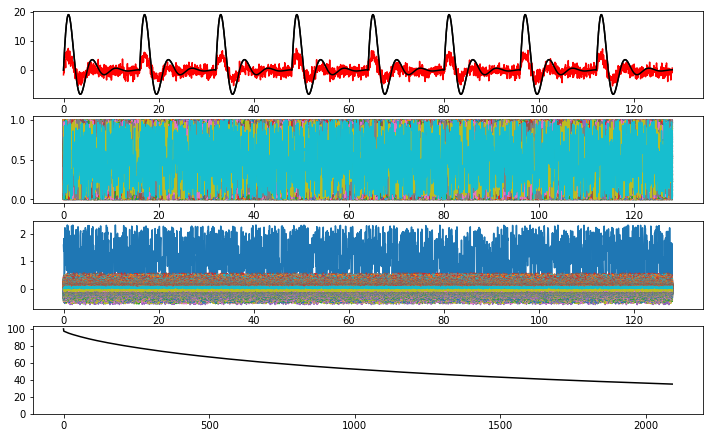

In [20]:
seuil = 35
r_rand_2, i_rand_2, c_rand_2, a_rand_2, phi_rand_2, aphi_rand_2, norm_r_rand_2, liste_rt_rand_2 = fct_MP (signaux_2, dic_phi_rand, seuil)
print (np.shape(i_rand_2)[0])

plot_fig (signaux_2, r_rand_2, aphi_rand_2, phi_rand_2, norm_r_rand_2)

ce dictionnaire marche pareil sur **les deux signaux** :
- il faut plus de 2000 boucles pour reduire à 35% le signal 1 et 2

## dictionnaire Gabor

In [21]:
def g (t, u, s, w, phase=0) :
    return np.exp(-np.pi*((t-u)/s)**2)*np.cos(w*(t-u)+phase)

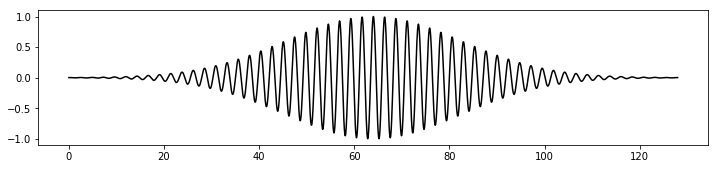

In [22]:
u, s, w = 64, 46, 500

fig, axs = plt.subplots(1, 1, figsize=(fig_width, (fig_width/3)/1.6180))
axs.plot(t, g(t, u, s, w), c='k');

In [23]:
dic_phi_gab = np.zeros((10000,2560))

for i in range(np.shape(dic_phi_gab)[0]):
    dic_phi_gab[i] = g (t, u=np.random.randint(128), s=np.random.randint(1, 50), w=np.random.randint(500))

### Signal 1

1467


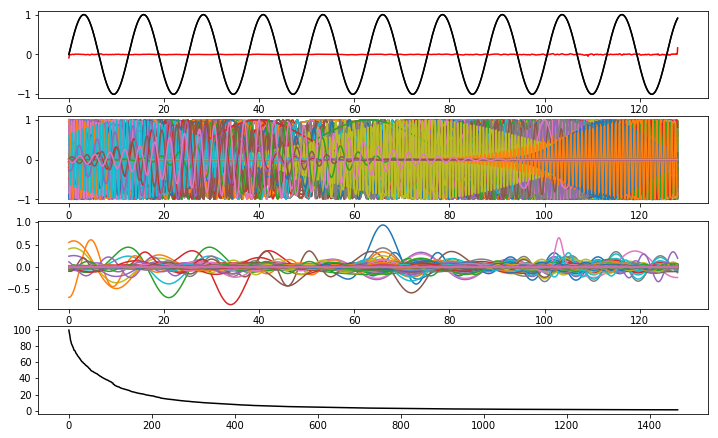

In [24]:
seuil = 1
r_gab_1, i_gab_1, c_gab_1, a_gab_1, phi_gab_1, aphi_gab_1, norm_r_gab_1, liste_rt_gab_1 = fct_MP (signaux_1, dic_phi_gab, seuil)
print (np.shape(i_gab_1)[0])

plot_fig (signaux_1, r_gab_1, aphi_gab_1, phi_gab_1, norm_r_gab_1)

### Signal 2

2450


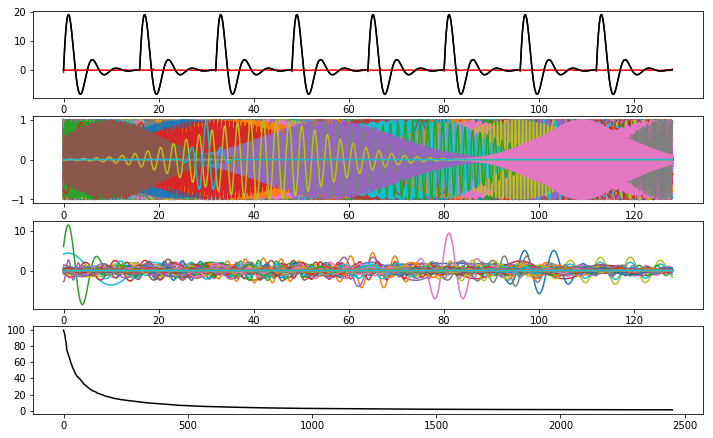

In [25]:
seuil = 1
r_gab_2, i_gab_2, c_gab_2, a_gab_2, phi_gab_2, aphi_gab_2, norm_r_gab_2, liste_rt_gab_2 = fct_MP (signaux_2, dic_phi_gab, seuil)
print (np.shape(i_gab_2)[0])

plot_fig (signaux_2, r_gab_2, aphi_gab_2, phi_gab_2, norm_r_gab_2)

ce dictionnaire marche mieu sur le signal 1 :
- il faut un peut plus de 1000 boucles pour reduire à 1% le signal 1
- alors qu'il en faut plus de 2500 pour reduire le signal 2 a 1%